In [5]:

%pip install  yellowbrick


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 6.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
from yellowbrick.cluster import KElbowVisualizer   
import cv2  

In [29]:
folder_dir = "data/image"
len(os.listdir(folder_dir))

15

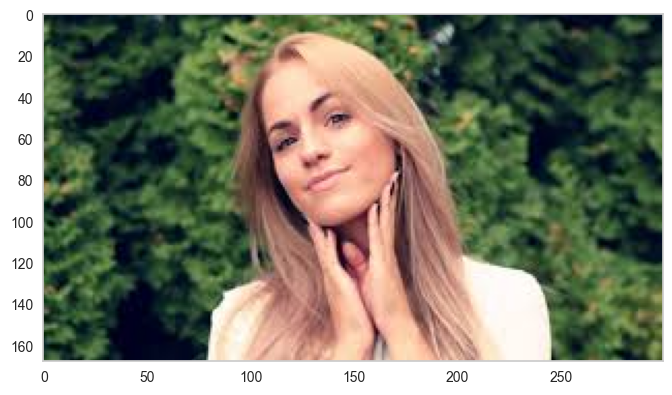

In [30]:
image = cv2.imread(os.path.join(folder_dir, "human3.jfif"))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.grid(False)
plt.show()

In [31]:
image

array([[[ 40,  60,  58],
        [ 22,  42,  40],
        [ 13,  33,  34],
        ...,
        [ 16,  32,  48],
        [ 18,  31,  47],
        [ 19,  32,  48]],

       [[ 22,  43,  38],
        [ 11,  32,  27],
        [  7,  27,  25],
        ...,
        [  8,  24,  40],
        [ 10,  23,  39],
        [ 11,  24,  40]],

       [[ 10,  32,  20],
        [  9,  30,  21],
        [ 11,  32,  25],
        ...,
        [  0,  14,  30],
        [  0,  15,  30],
        [  0,  16,  31]],

       ...,

       [[ 21,  53,  29],
        [ 31,  64,  35],
        [ 48,  81,  50],
        ...,
        [ 96, 115,  59],
        [ 84, 101,  47],
        [ 80,  97,  43]],

       [[ 26,  59,  28],
        [ 36,  70,  35],
        [ 51,  85,  48],
        ...,
        [ 85, 106,  50],
        [ 73,  91,  39],
        [ 72,  90,  38]],

       [[ 38,  72,  37],
        [ 46,  80,  43],
        [ 59,  94,  52],
        ...,
        [ 72,  92,  39],
        [ 60,  78,  28],
        [ 61,  79,  29]]

In [32]:
px_image=image.reshape(-1,3).astype(np.float32)
px_image.shape
table = pd.DataFrame(px_image, columns=["red","green","blue"])
px_image = px_image/255.0
table.head(10)

,red,green,blue
0,40.0,60.0,58.0
1,22.0,42.0,40.0
2,13.0,33.0,34.0
3,22.0,42.0,43.0
4,28.0,47.0,53.0
5,22.0,41.0,47.0
6,16.0,34.0,44.0
7,16.0,34.0,44.0
8,9.0,27.0,41.0
9,5.0,23.0,37.0


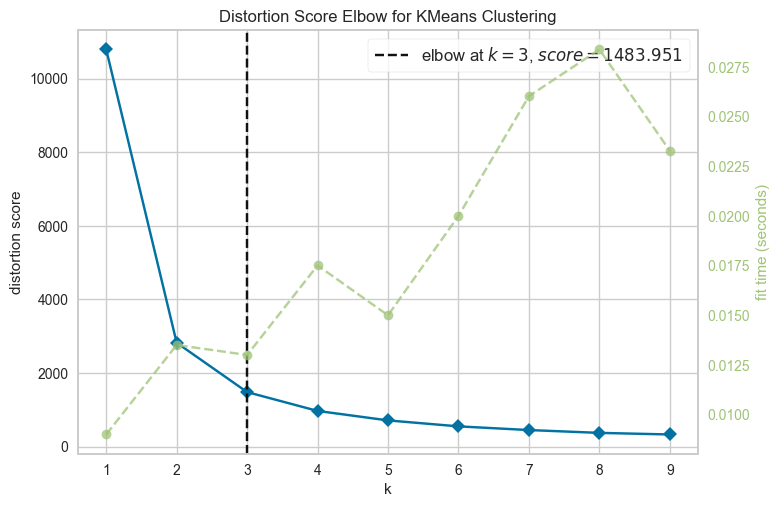

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(px_image)
visualize.show()

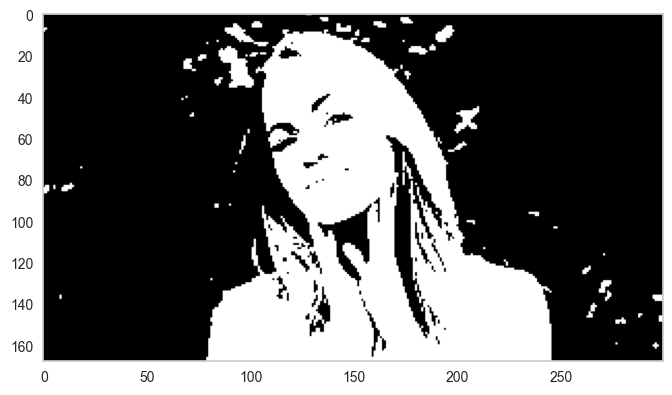

In [34]:
n_clusters = 2
kmean = KMeans(n_clusters=n_clusters).fit(px_image)
result = kmean.labels_.reshape(image.shape[0], image.shape[1])
clus = kmean.predict(px_image)
plt.imshow(result)
plt.grid(False)
plt.show()

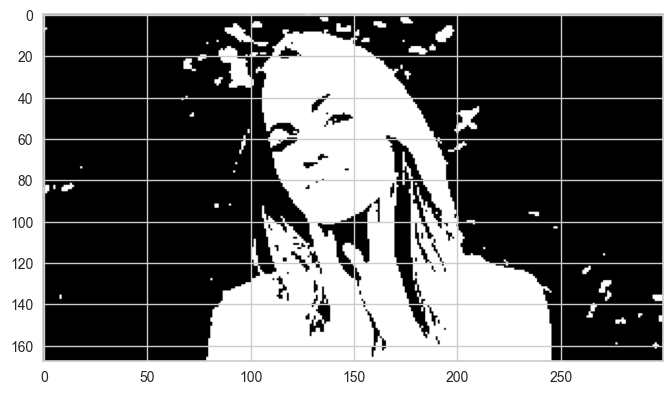

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [35]:

final_image = clus.reshape((image.shape[0], image.shape[1]))
plt.imshow(final_image)
plt.show()
print(final_image)

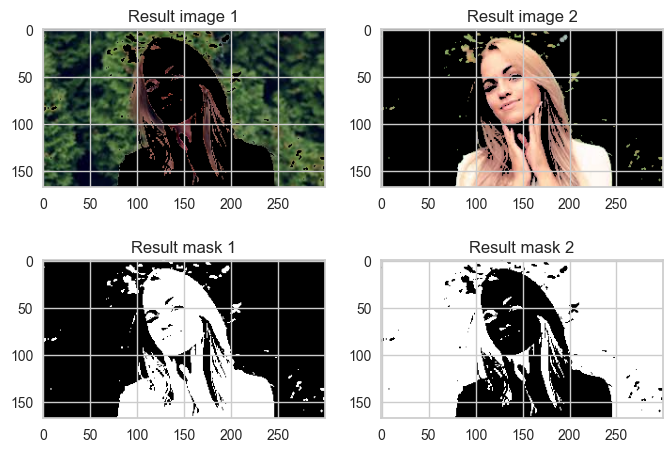

In [40]:
final_image0 = np.where(final_image==1, 45, 0)
final_image1 = np.where(final_image==0, 255, 0)

final_image0 = np.uint8(final_image0)
final_image1 = np.uint8(final_image1)

re0 = cv2.bitwise_and(image, image, mask=final_image0)
re1 = cv2.bitwise_and(image, image, mask=final_image1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.imshow(re0)
ax1.set_title("Result image 1")
ax2.imshow(re1)
ax2.set_title("Result image 2")
ax3.imshow(final_image0)
ax3.set_title("Result mask 1")
ax4.imshow(final_image1)
ax4.set_title("Result mask 2")
plt.show()